In [1]:
#paths
# dell laptop
methods_path = 'C:/Users/sapje1/code/python_mrdatamethods/'
diffdir_path = 'C:/Users/sapje1/OneDrive - Cardiff University/MR Physics & Equipment/protocols/Diffusion/Connectom/MGH_Diff'

In [2]:
#paths
# wl026
methods_path = '/home/sapje1/code/python_mrobjects'
diffdir_path = '/home/sapje1/MR/diffusion/MGH_Diff'

In [49]:
# script to check siemens diffusion direction file
import os
import sys
sys.path.append(methods_path)
import diffusion_directions.siemensdirclass as dirn
import matplotlib.pyplot as plt
import numpy as np

266
Dimensions:  (266, 3)
Directions:  266
Vector max : 1.0000000051934077
Vector min : 0.0
b values:        [   0.     200.934  501.126 1198.854 2396.544 3995.136 6000.   ]
Number of dirs:  [13 20 20 30 61 61 61]


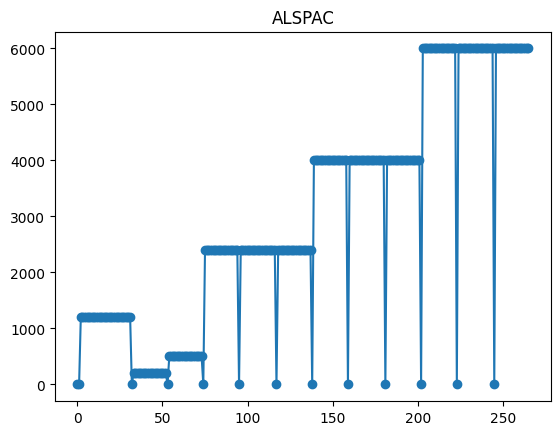

In [11]:
alspac = dirn.SiemensDir('ALSPAC')
alspac_dirfile = 'ALSPAC2.dir'
alspac.readdirfile(os.path.join(diffdir_path,alspac_dirfile))

%matplotlib inline
alspac.plotbval(6000,'alspac')

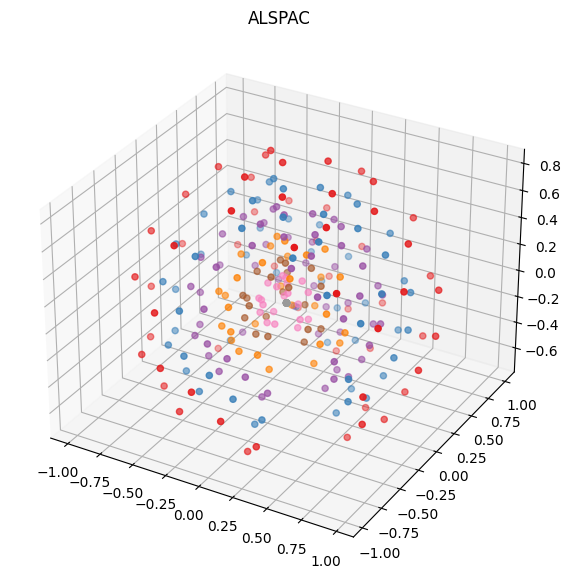

In [5]:
%matplotlib inline
alspac.plotsphere()

161
Dimensions:  (161, 3)
Directions:  161
Vector max : 1.0000000051934077
Vector min : 0.0
b values:        [   0.    1198.854 2396.544 6000.   ]
Number of dirs:  [ 9 30 61 61]


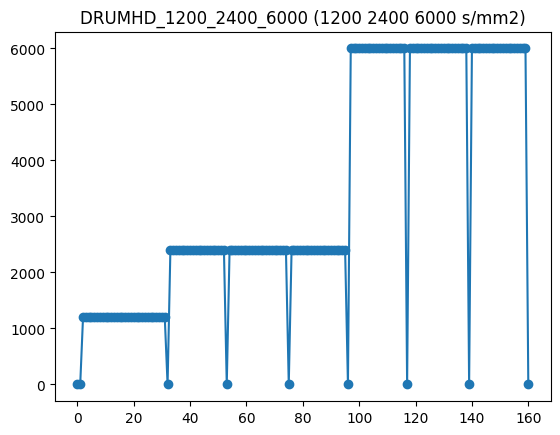

Opened drumhd_1200_2400_6000.dir for writing


In [6]:
# DRUM-HD used in first pilot (1200 2400 6000 s/mm2)
%matplotlib inline
drum120024006000 = dirn.SiemensDir('DRUMHD_1200_2400_6000 (1200 2400 6000 s/mm2)')
nexidir = alspac.gvec[0:33]
nexidir = np.append(nexidir, alspac.gvec[75:139], axis=0) #b=1200, b0 at end of block
nexidir = np.append(nexidir, alspac.gvec[203:], axis=0) # b=2400, b0 at end of block
nexidir = np.append(nexidir, np.zeros([1,3]), axis=0) # b=6000, b0 at end of acq
drum120024006000.setdir(nexidir)
drum120024006000.plotbval(6000,'nexi')
drum120024006000.writedirfile('drumhd_1200_2400_6000.dir')

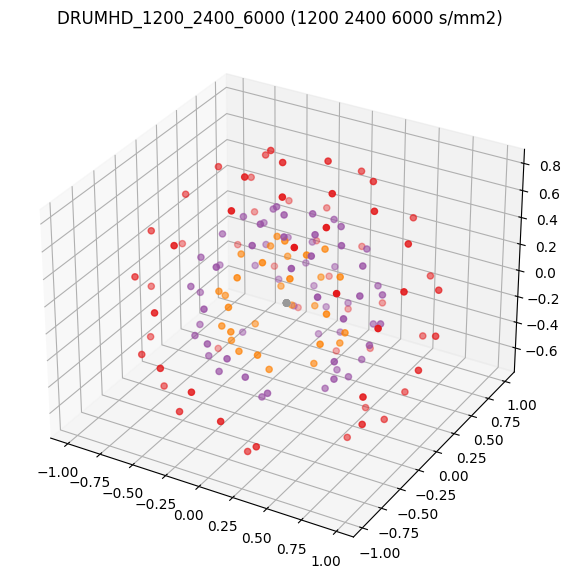

In [12]:
%matplotlib inline
drum120024006000.plotsphere()

161
Dimensions:  (161, 3)
Directions:  161
Vector max : 1.0000000051934077
Vector min : 0.0
b values:        [   0.    1198.854 3995.136 6000.   ]
Number of dirs:  [ 9 30 61 61]


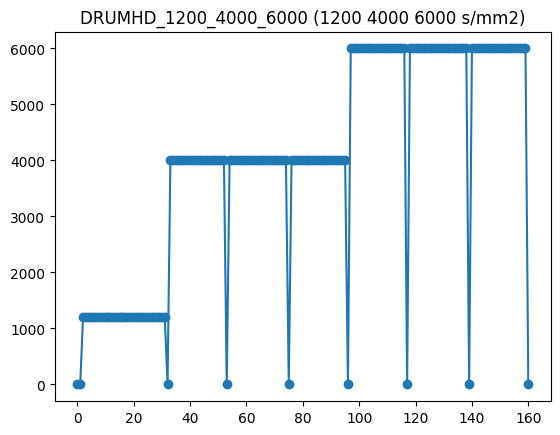

Opened drumhd_1200_4000_6000.dir for writing


In [8]:
# DRUM-HD with 4000, instead of 2400 shell (1200 2400 6000 s/mm2)
%matplotlib inline
drum120040006000 = dirn.SiemensDir('DRUMHD_1200_4000_6000 (1200 4000 6000 s/mm2)')
nexidir = []
nexidir = alspac.gvec[0:33]  #b=1200, b0 at end of block
#nexidir = np.append(nexidir, alspac.gvec[75:139], axis=0) # b=2400, b0 at end of block
nexidir = np.append(nexidir, alspac.gvec[139:203], axis=0) # b=4000, b0 at end of block
nexidir = np.append(nexidir, alspac.gvec[203:], axis=0) # b=6000 
nexidir = np.append(nexidir, np.zeros([1,3]), axis=0) # b0 at end of acq
drum120040006000.setdir(nexidir)
drum120040006000.plotbval(6000,'nexi')
drum120040006000.writedirfile('drumhd_1200_4000_6000.dir')

<IPython.core.display.Javascript object>


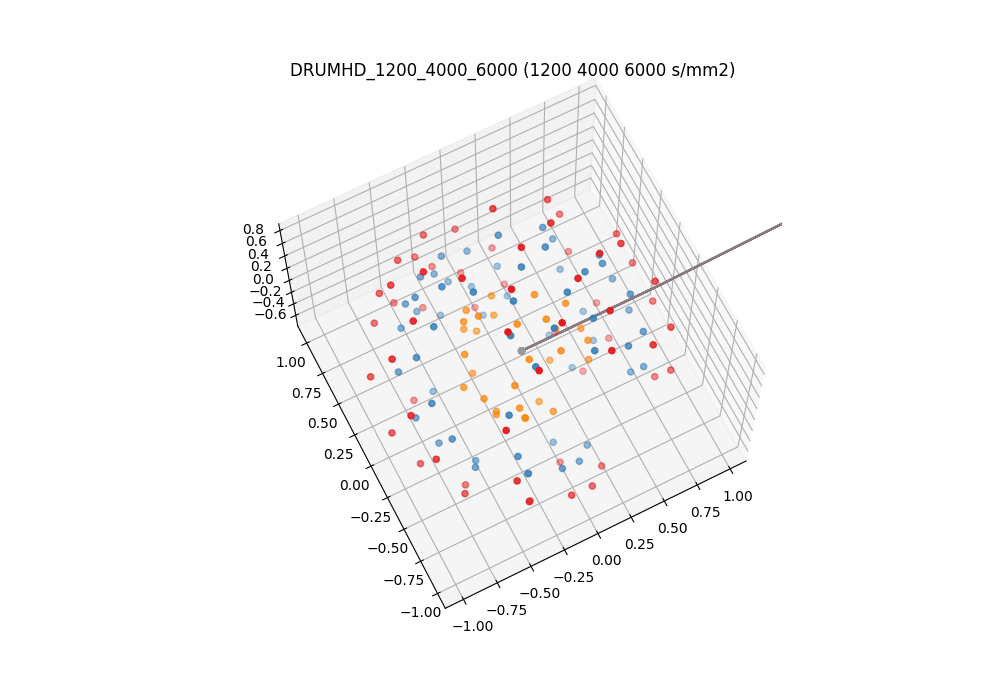

In [20]:
%matplotlib notebook
drum120040006000.plotsphere()

225
Dimensions:  (225, 3)
Directions:  225
Vector max : 1.0000000051934077
Vector min : 0.0
b values:        [   0.    1198.854 2396.544 3995.136 6000.   ]
Number of dirs:  [12 30 61 61 61]


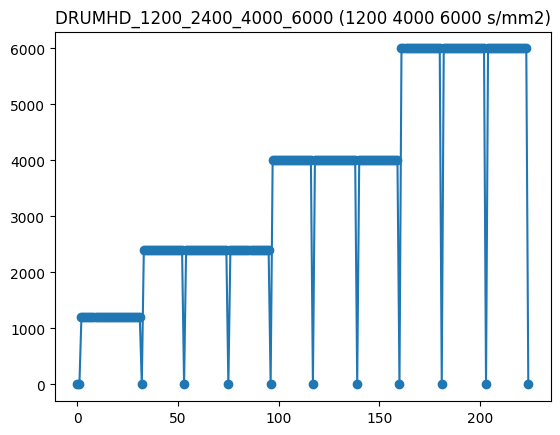

Opened drumhd_1200_2400_4000_6000.dir for writing


In [10]:
# DRUM-HD with 2400 AND 4000 shells for piloting NEXI check (1200 2400 4000 6000 s/mm2)
%matplotlib inline
drum1200_2400_4000_6000 = dirn.SiemensDir('DRUMHD_1200_2400_4000_6000 (1200 4000 6000 s/mm2)')
nexidir = []
nexidir = alspac.gvec[0:33]  #b=1200, b0 at end of block
nexidir = np.append(nexidir, alspac.gvec[75:139], axis=0) # b=2400, b0 at end of block
nexidir = np.append(nexidir, alspac.gvec[139:203], axis=0) # b=4000, b0 at end of block
nexidir = np.append(nexidir, alspac.gvec[203:], axis=0) # b=6000 
nexidir = np.append(nexidir, np.zeros([1,3]), axis=0) # b0 at end of acq
drum1200_2400_4000_6000.setdir(nexidir)
drum1200_2400_4000_6000.plotbval(6000,'nexi')
drum1200_2400_4000_6000.writedirfile('drumhd_1200_2400_4000_6000.dir')

<IPython.core.display.Javascript object>


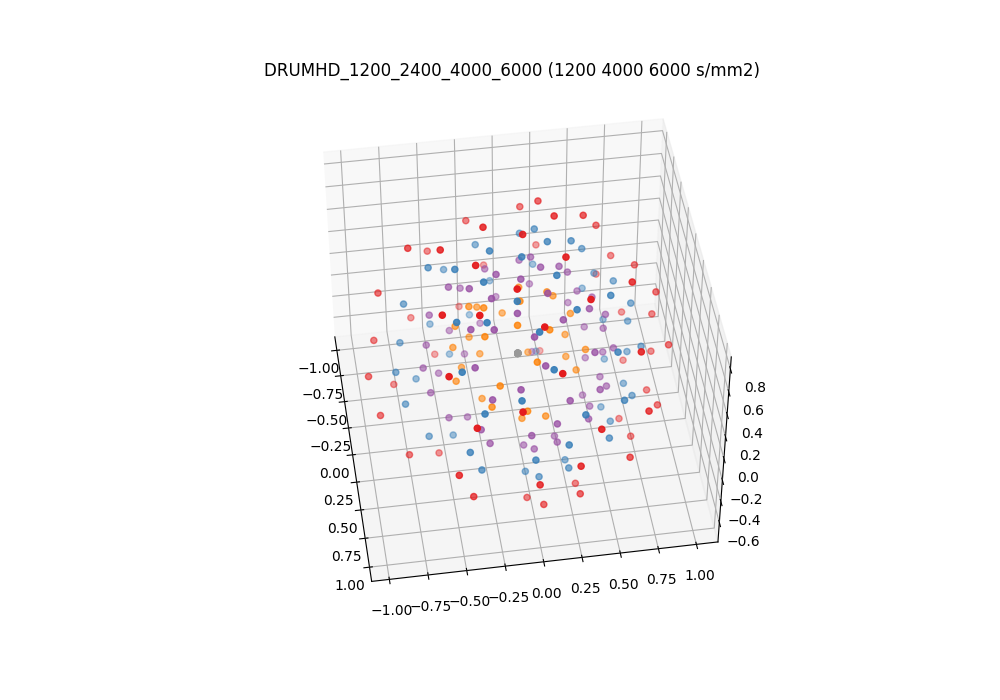

In [15]:
%matplotlib notebook
drum1200_2400_4000_6000.plotsphere()

In [19]:
# use the sum of vectors as an estimate of coverage
# these are non-zero, but not sure how close to zero it should be...?
print(np.sum(drum1200_2400_4000_6000.gvec,0))
print(np.sum(drum120024006000.gvec,0))
print(np.sum(drum120040006000.gvec,0))

[-1.18305092 13.63530659 12.03363909]
[-1.25899576  8.85243141  8.23340667]
[-1.24187758  9.93050743  9.08999173]


161
Dimensions:  (161, 3)
Directions:  161
Vector max : 1.0000000051934077
Vector min : 0.0
b values:        [   0.    1198.854 2396.544 6000.   ]
Number of dirs:  [ 9 30 61 61]


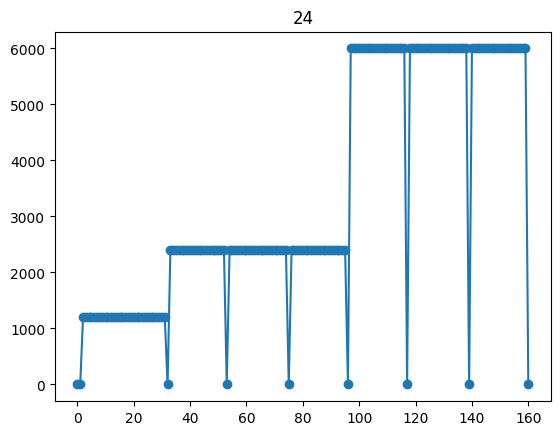

In [53]:
# read back file, as a check
hd1 = dirn.SiemensDir('24')
hd1.readdirfile('drumhd_1200_2400_6000.dir')
hd1.plotbval(6000,'drumhd_1200_2400_6000.dir')

161
Dimensions:  (161, 3)
Directions:  161
Vector max : 1.0000000051934077
Vector min : 0.0
b values:        [   0.    1198.854 3995.136 6000.   ]
Number of dirs:  [ 9 30 61 61]


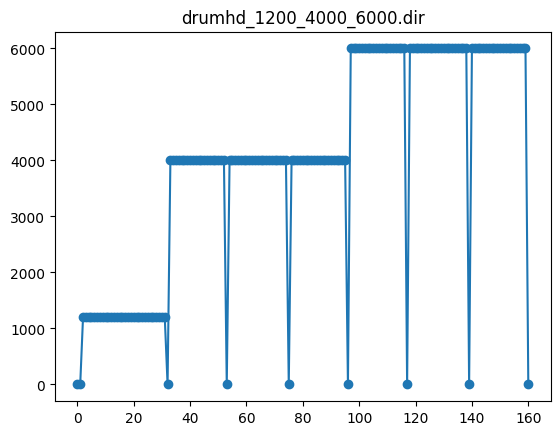

In [56]:
# read back file, as a check
f_hd2 = 'drumhd_1200_4000_6000.dir'
hd2 = dirn.SiemensDir(f_hd2)
hd2.readdirfile(f_hd2)
hd2.plotbval(6000,f_hd2)

225
Dimensions:  (225, 3)
Directions:  225
Vector max : 1.0000000051934077
Vector min : 0.0
b values:        [   0.    1198.854 2396.544 3995.136 6000.   ]
Number of dirs:  [12 30 61 61 61]


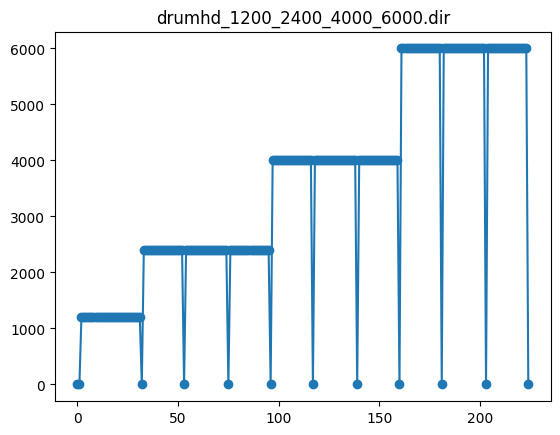

In [58]:
# read back file, as a check
f_hd3 = 'drumhd_1200_2400_4000_6000.dir'
hd3 = dirn.SiemensDir(f_hd3)
hd3.readdirfile(f_hd3)
hd3.plotbval(6000,f_hd3)